##  Plot Melville Bay ambient sound level data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
## rink/fisher
rink1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_TOL.csv")
rink1920_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_AuralM2_TOL.csv")
rink1920_ST_tol_df    = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_ST_TOL_UTC.csv")
# daily noise
rink1819_aural_1to10kHz_df = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_daily_noise_1to10kHz.csv')
rink1920_aural_1to10kHz_df = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_AuralM2_daily_noise_1to10kHz.csv')
rink1920_ST_1to10kHz_df    = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_ST_UTC_daily_noise_1to10kHz.csv')

## kong oscar
kong1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_TOL.csv")
kong1920_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_AuralM2_TOL.csv")
kong1920_ST_tol_df    = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_TOL_UTC.csv")
# daily noise
kong1819_aural_1to10kHz_df = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_daily_noise_1to10kHz.csv')
kong1920_aural_1to10kHz_df = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_AuralM2_daily_noise_1to10kHz.csv')
kong1920_ST_1to10kHz_df    = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_UTC_daily_noise_1to10kHz.csv')

## sverdrup
sver1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_TOL.csv")
# daily noise
sver1819_aural_1to10kHz_df = pd.read_csv('D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_daily_noise_1to10kHz.csv')

DAILY

In [3]:
## rink/fisher
rink1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_daily_TOL.csv")
rink1920_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_AuralM2_daily_TOL.csv")
rink1920_ST_tol_df    = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_ST_UTC_daily_TOL.csv")

## kong oscar
kong1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_daily_TOL.csv")
kong1920_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_AuralM2_daily_TOL.csv")
kong1920_ST_tol_df    = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_UTC_daily_TOL.csv")

## sverdrup
sver1819_aural_tol_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_daily_TOL.csv")

Function to display TOL violin plots

In [4]:
def tol_violin_plots(tol_df,tol_lower,tol_upper):
    # plot subset
    df = pd.melt(tol_df, id_vars='Time', value_vars=tol_df.loc[:,tol_lower:tol_upper], var_name='TOL', value_name='dB')
    plt.rcParams['figure.figsize'] = (16,3)
    sns.violinplot(x=df['TOL'],y=df['dB']);
    plt.ylabel("TOL (dB re 1 uPa RMS)")
    plt.xlabel("TOL center frequency")

Function to make xarray DataArray

In [5]:
def make_sound_ds(tol_df):
    time_list = []
    for i in range(len(tol_df.Time)):
        if tol_df.Time[i][3:6] == 'Aug':
            month = '08'
        elif tol_df.Time[i][3:6] == 'Sep':
            month = '09'
        elif tol_df.Time[i][3:6] == 'Oct':
            month = '10'
        elif tol_df.Time[i][3:6] == 'Nov':
            month = '11'
        elif tol_df.Time[i][3:6] == 'Dec':
            month = '12'
        date_tmp = tol_df.Time[i][7:11]+'-'+month+'-'+tol_df.Time[i][0:2]+'T'+tol_df.Time[i][12:20]
        time_list.append(date_tmp)
    
    ## make dataset
    ds = xr.Dataset(data_vars=dict(Hz1000=(["time"], tol_df['1000Hz']),
                                   Hz1250=(["time"], tol_df['1250Hz']),
                                   Hz1600=(["time"], tol_df['1600Hz']),
                                   Hz2000=(["time"], tol_df['2000Hz']),
                                   Hz2500=(["time"], tol_df['2500Hz']),
                                   Hz4000=(["time"], tol_df['4000Hz'])),
        coords=dict(time=np.array(time_list, dtype='datetime64')))
    
    return ds.sortby(ds.time)

In [6]:
def make_sound_ds(tol_df):
    time_list = []
    for i in range(len(tol_df.Time)):
        if tol_df.Time[i][3:6] == 'Aug':
            month = '08'
        elif tol_df.Time[i][3:6] == 'Sep':
            month = '09'
        elif tol_df.Time[i][3:6] == 'Oct':
            month = '10'
        elif tol_df.Time[i][3:6] == 'Nov':
            month = '11'
        elif tol_df.Time[i][3:6] == 'Dec':
            month = '12'
        date_tmp = tol_df.Time[i][7:11]+'-'+month+'-'+tol_df.Time[i][0:2]
        time_list.append(date_tmp)
    
    ## make dataset
    ds = xr.Dataset(data_vars=dict(Hz1000=(["time"], tol_df['1000Hz']),
                                   Hz1250=(["time"], tol_df['1250Hz']),
                                   Hz1600=(["time"], tol_df['1600Hz']),
                                   Hz2000=(["time"], tol_df['2000Hz']),
                                   Hz2500=(["time"], tol_df['2500Hz']),
                                   Hz4000=(["time"], tol_df['4000Hz'])),
        coords=dict(time=np.array(time_list, dtype='datetime64')))
    
    return ds.sortby(ds.time)

In [7]:
rink1819_aural_tol_ds = make_sound_ds(rink1819_aural_tol_df)
rink1920_aural_tol_ds = make_sound_ds(rink1920_aural_tol_df)
rink1920_ST_tol_ds    = make_sound_ds(rink1920_ST_tol_df)

In [8]:
kong1819_aural_tol_ds = make_sound_ds(kong1819_aural_tol_df)
kong1920_aural_tol_ds = make_sound_ds(kong1920_aural_tol_df)
kong1920_ST_tol_ds    = make_sound_ds(kong1920_ST_tol_df)

In [9]:
sver1819_aural_tol_ds = make_sound_ds(sver1819_aural_tol_df)

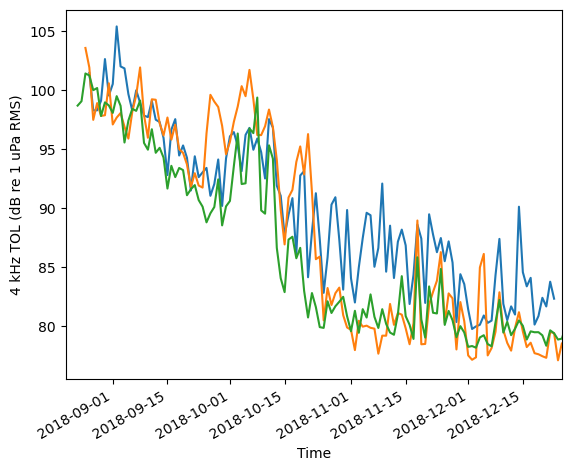

In [132]:
rink1819_aural_tol_ds.Hz4000.plot(label='rink')
# rink1920_aural_tol_ds.Hz4000.plot(label='rink')
# rink1920_ST_tol_ds.Hz4000.plot(label='rink')
kong1819_aural_tol_ds.Hz4000.plot()
# kong1920_aural_tol_ds.Hz4000.plot()
# kong1920_ST_tol_ds.Hz4000.plot()
sver1819_aural_tol_ds.Hz4000.plot()

# plt.legend()
plt.ylabel("4 kHz TOL (dB re 1 uPa RMS)")
plt.xlim(np.datetime64("2018-08-20"),np.datetime64("2018-12-25"))
plt.xlabel("Time");

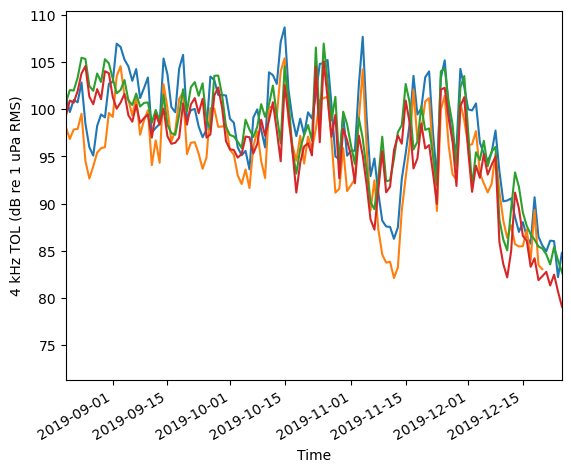

In [131]:
# rink1819_aural_tol_ds.Hz4000.plot(label='rink')
rink1920_aural_tol_ds.Hz4000.plot(label='rink')
rink1920_ST_tol_ds.Hz4000.plot(label='rink')
# kong1819_aural_tol_ds.Hz4000.plot()
kong1920_aural_tol_ds.Hz4000.plot()
kong1920_ST_tol_ds.Hz4000.plot()
# sver1819_aural_tol_ds.Hz4000.plot()

# plt.legend()
plt.ylabel("4 kHz TOL (dB re 1 uPa RMS)")
plt.xlim(np.datetime64("2019-08-20"),np.datetime64("2019-12-25"))
plt.xlabel("Time");

***

### Rink/Fisher

#### Violin plots of TOL bands

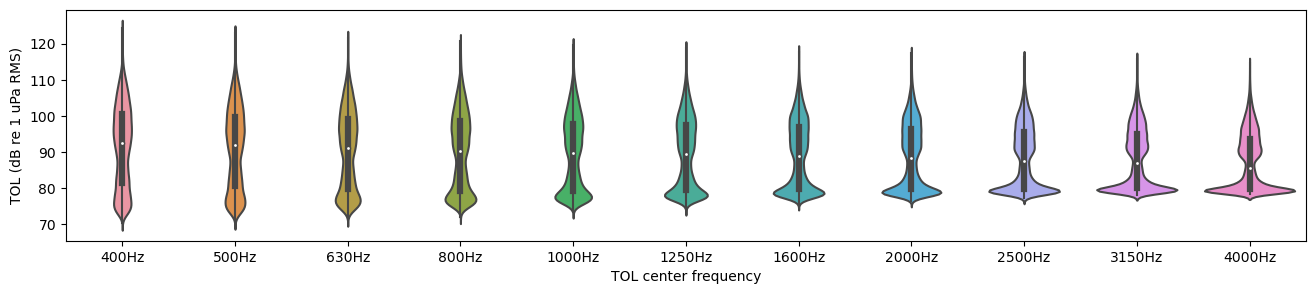

In [38]:
tol_violin_plots(rink1819_aural_tol_df,'400Hz','4000Hz')

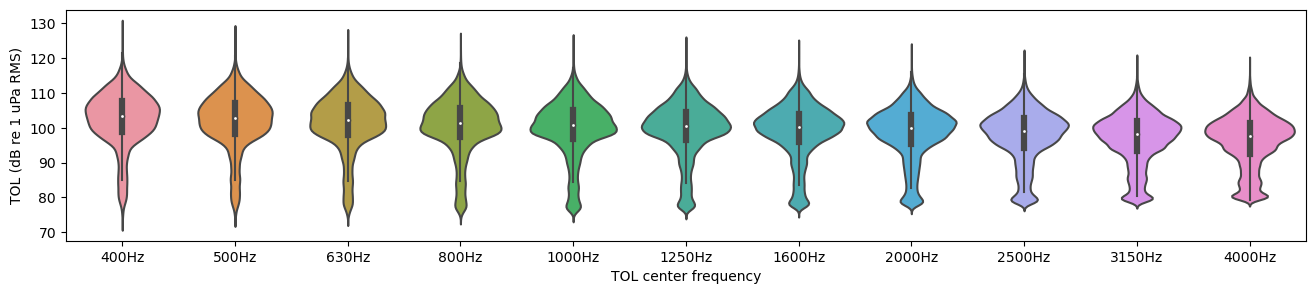

In [85]:
tol_violin_plots(rink1920_aural_tol_df,'400Hz','4000Hz')

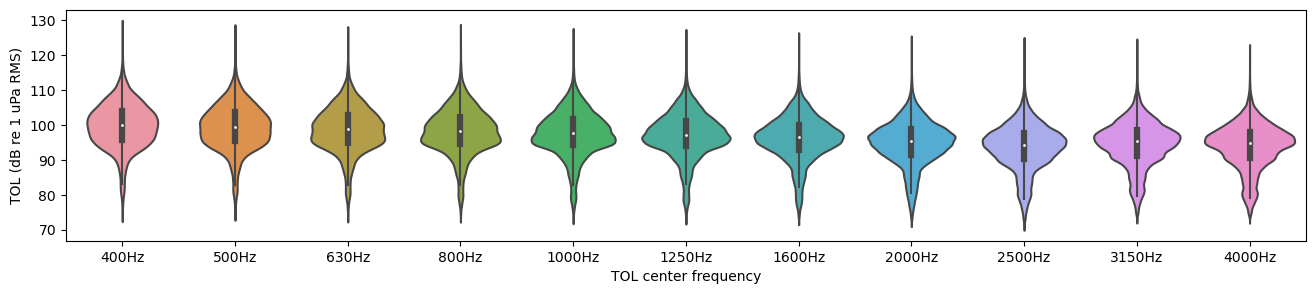

In [47]:
tol_violin_plots(rink1920_ST_tol_df,'400Hz','4000Hz')

#### 1-10 kHz decade level - daily

In [10]:
rink1819_aural_1to10kHz_df['Hz1000to10000'].median()

101.2535088849895

In [11]:
rink1920_aural_1to10kHz_df['Hz1000to10000'].median()

110.494739653745

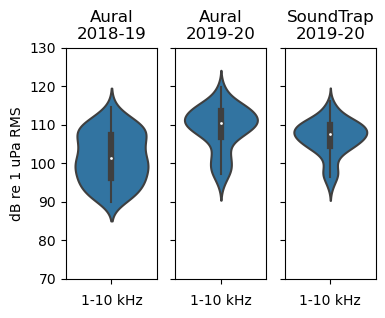

In [82]:
plt.rcParams['figure.figsize'] = (4,3)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
sns.violinplot(y=rink1819_aural_1to10kHz_df['Hz1000to10000'], ax=ax1)
sns.violinplot(y=rink1920_aural_1to10kHz_df['Hz1000to10000'], ax=ax2)
sns.violinplot(y=rink1920_ST_1to10kHz_df['Hz1000to10000'], ax=ax3)
ax1.set_title('Aural\n2018-19')
ax2.set_title('Aural\n2019-20')
ax3.set_title('SoundTrap\n2019-20')
ax1.set_ylim(70,130)

ax1.set_ylabel("dB re 1 uPa RMS")
ax2.set_ylabel("")
ax3.set_ylabel("")
for ax in (ax1,ax2,ax3):
    ax.set_xlabel("1-10 kHz");

#### Look at correlation between TOL bands

In [33]:
def plot_corr(data_df):
    data = data_df.loc[:,'10Hz':'12500Hz']
    corr = data.corr()
    
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (8,8)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.show()
    
    return corr

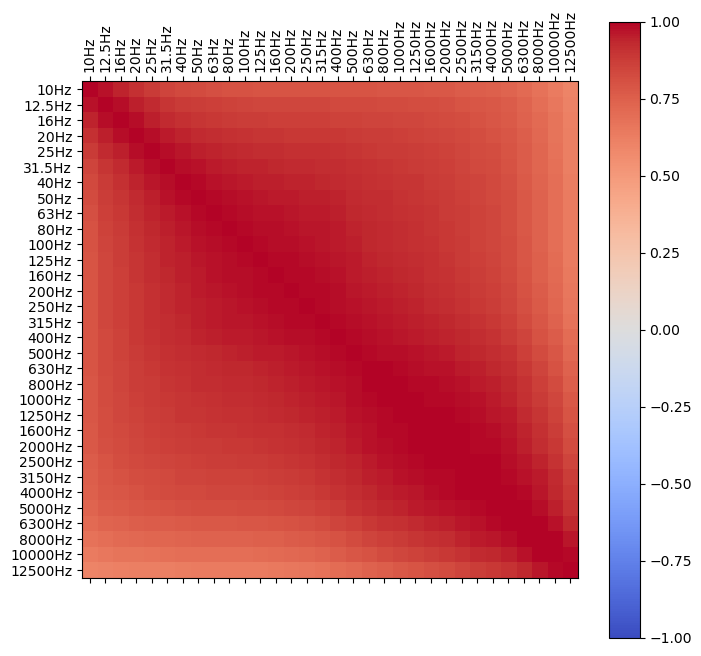

In [34]:
corr = plot_corr(rink1819_aural_tol_df)

In [36]:
corr.min()

10Hz       0.596118
12.5Hz     0.607814
16Hz       0.616049
20Hz       0.617879
25Hz       0.622573
31.5Hz     0.624860
40Hz       0.631458
50Hz       0.633584
63Hz       0.633437
80Hz       0.634122
100Hz      0.635688
125Hz      0.638213
160Hz      0.643375
200Hz      0.651765
250Hz      0.662785
315Hz      0.677738
400Hz      0.696913
500Hz      0.718549
630Hz      0.739715
800Hz      0.757254
1000Hz     0.775062
1250Hz     0.782905
1600Hz     0.778999
2000Hz     0.773593
2500Hz     0.764469
3150Hz     0.753393
4000Hz     0.744110
5000Hz     0.731384
6300Hz     0.705010
8000Hz     0.673026
10000Hz    0.639491
12500Hz    0.596118
dtype: float64

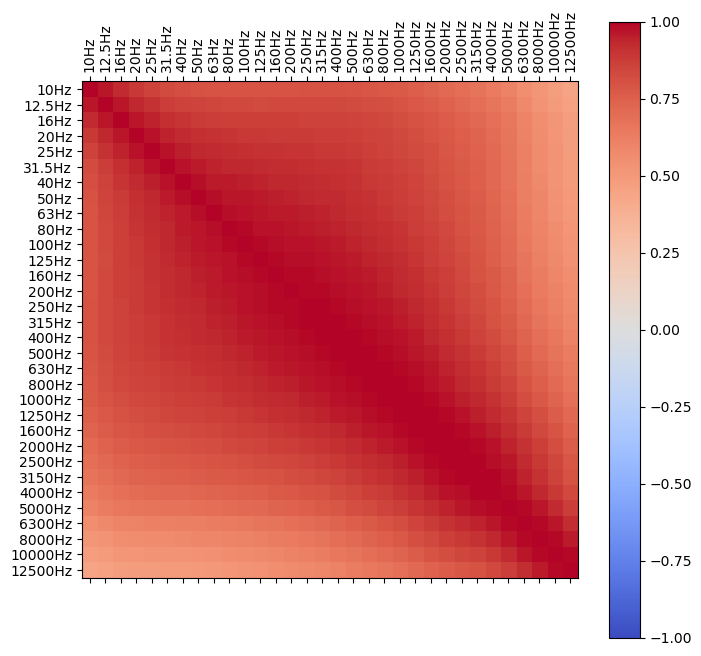

In [38]:
corr = plot_corr(rink1920_aural_tol_df)

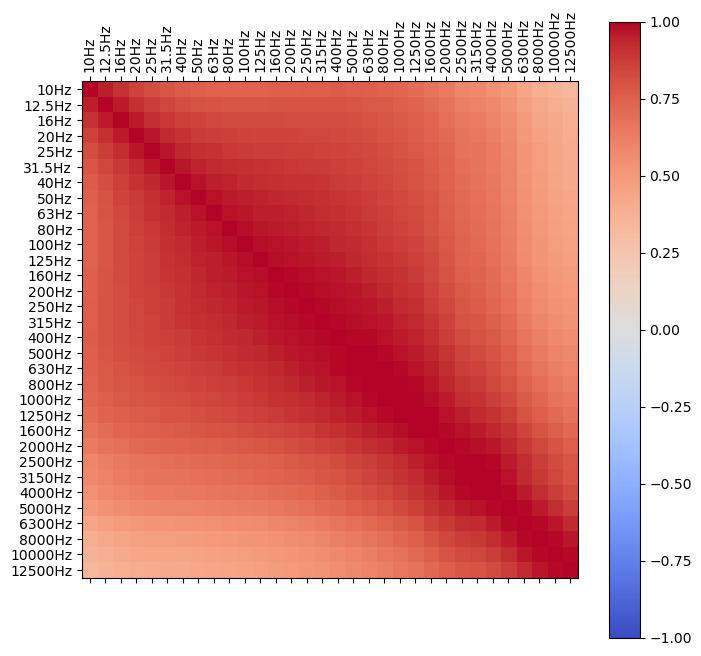

In [44]:
corr = plot_corr(rink1920_ST_tol_df)

#### Plot decade band and TOL correlation

In [5]:
rink1819_aural_tol_1D_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_daily_TOL.csv")

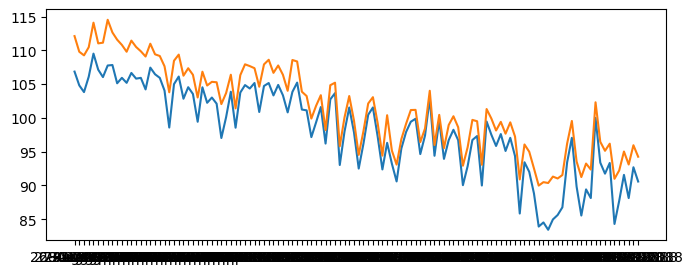

In [8]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(rink1819_aural_tol_1D_df.Time, rink1819_aural_tol_1D_df['400Hz'])
plt.plot(rink1819_aural_1to10kHz_df.Time, rink1819_aural_1to10kHz_df.Hz1000to10000)

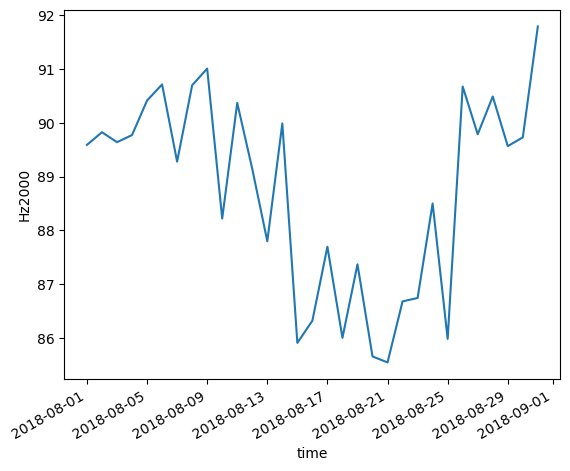

In [83]:
rink1819_aural_tol_ds.sel(time=slice('2018-08','2018-11')).Hz2000.resample(time='1D').mean('time').plot()

<AxesSubplot:ylabel='Hz2000'>

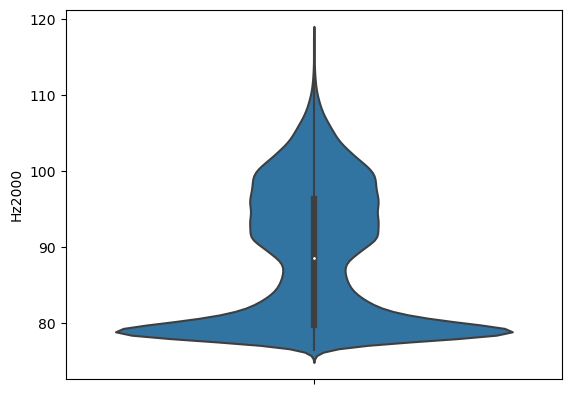

In [81]:
sns.violinplot(y=rink1819_aural_tol_ds.sel(time=slice('2018-08','2018-11')).Hz2000)

In [82]:
rink1920_ST_tol_prctiles_df['2000Hz_L50'].mean()

94.29346715328462

### Kong Oscar

#### Violin plots of TOL bands

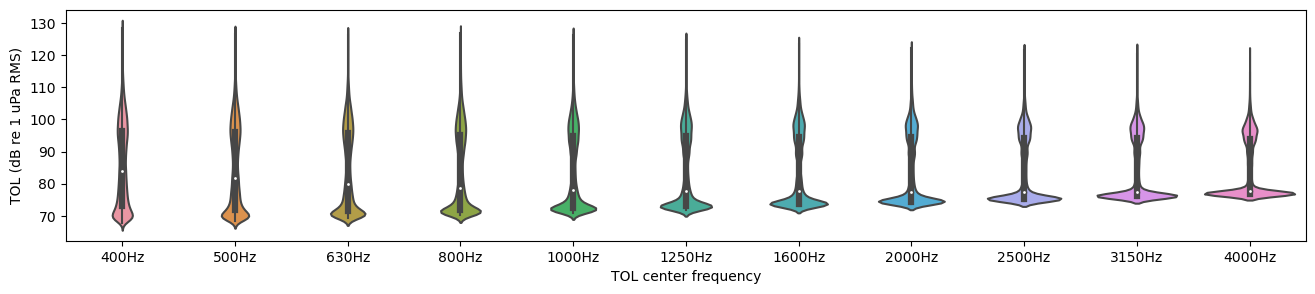

In [39]:
tol_violin_plots(kong1819_aural_tol_df,'400Hz','4000Hz')

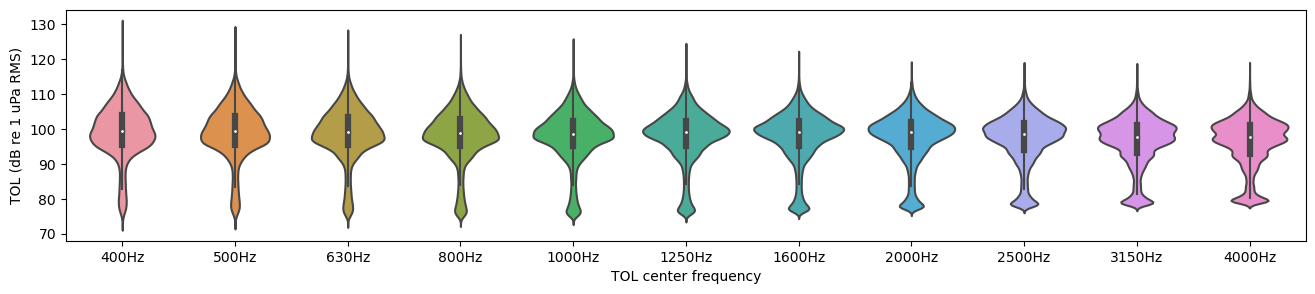

In [59]:
tol_violin_plots(kong1920_aural_tol_df,'400Hz','4000Hz')

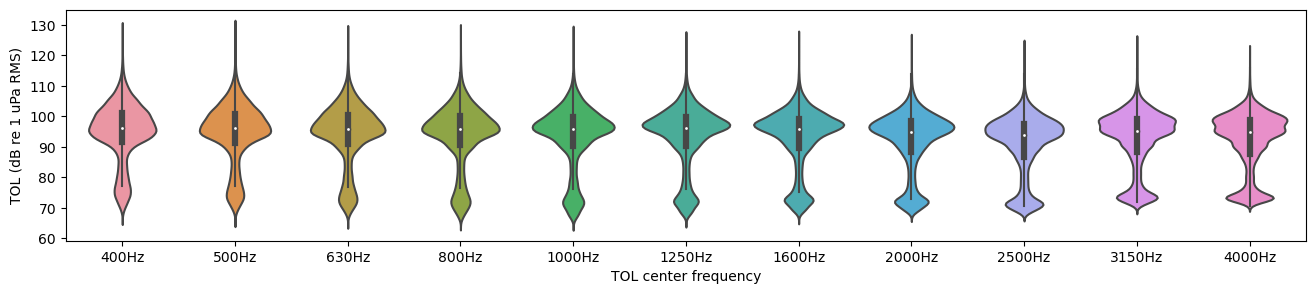

In [45]:
tol_violin_plots(kong1920_ST_tol_df,'400Hz','4000Hz')

#### 1-10 kHz decade level

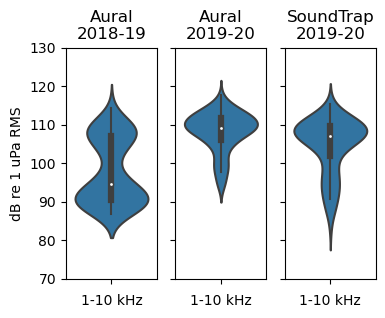

In [6]:
plt.rcParams['figure.figsize'] = (4,3)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
sns.violinplot(y=kong1819_aural_1to10kHz_df['Hz1000to10000'], ax=ax1)
sns.violinplot(y=kong1920_aural_1to10kHz_df['Hz1000to10000'], ax=ax2)
sns.violinplot(y=kong1920_ST_1to10kHz_df['Hz1000to10000'], ax=ax3)
ax1.set_title('Aural\n2018-19')
ax2.set_title('Aural\n2019-20')
ax3.set_title('SoundTrap\n2019-20')
ax1.set_ylim(70,130)

ax1.set_ylabel("dB re 1 uPa RMS")
ax2.set_ylabel("")
ax3.set_ylabel("")
for ax in (ax1,ax2,ax3):
    ax.set_xlabel("1-10 kHz");

#### Look at correlation between TOL bands

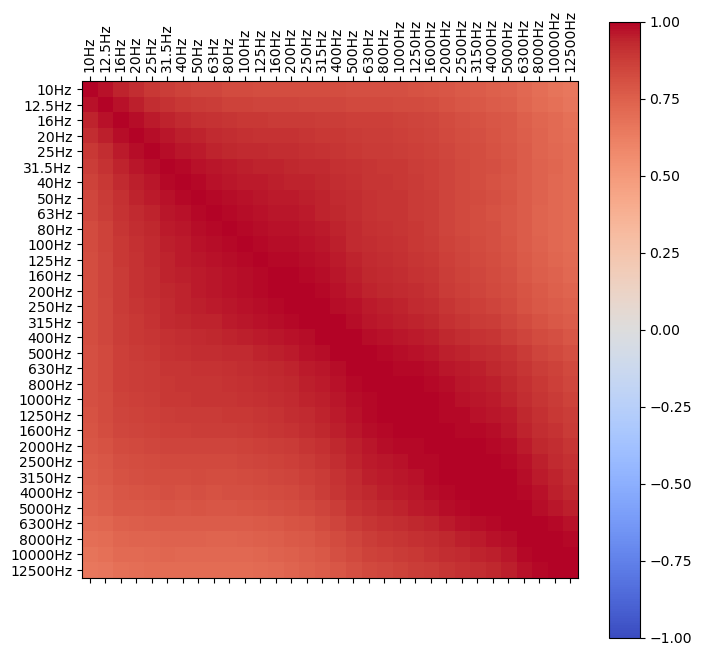

In [40]:
corr = plot_corr(kong1819_aural_tol_df)

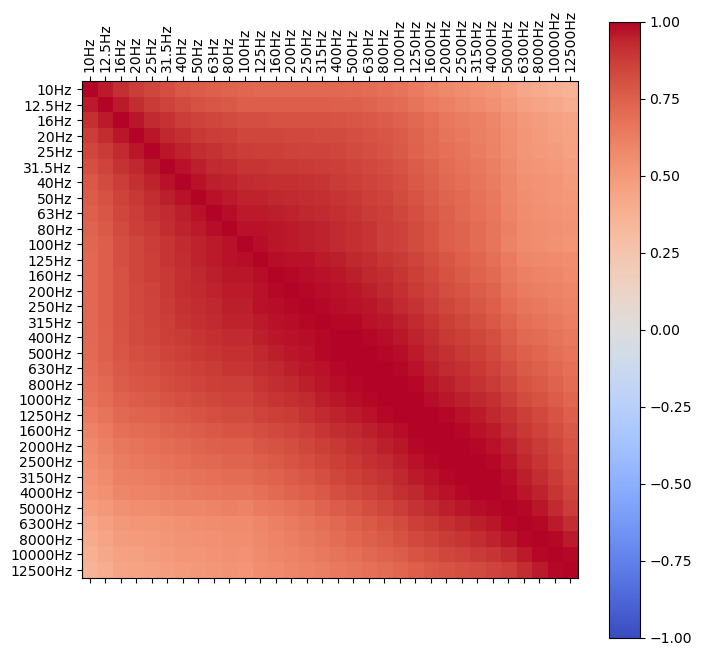

In [41]:
corr = plot_corr(kong1920_aural_tol_df)

In [42]:
corr.min()

10Hz       0.358775
12.5Hz     0.392025
16Hz       0.438931
20Hz       0.447547
25Hz       0.458847
31.5Hz     0.475680
40Hz       0.491486
50Hz       0.505049
63Hz       0.512960
80Hz       0.525158
100Hz      0.519083
125Hz      0.546929
160Hz      0.566471
200Hz      0.583964
250Hz      0.602586
315Hz      0.622968
400Hz      0.643490
500Hz      0.662145
630Hz      0.681526
800Hz      0.684626
1000Hz     0.664256
1250Hz     0.635132
1600Hz     0.605382
2000Hz     0.577223
2500Hz     0.556719
3150Hz     0.535477
4000Hz     0.510551
5000Hz     0.471775
6300Hz     0.428709
8000Hz     0.403805
10000Hz    0.381981
12500Hz    0.358775
dtype: float64

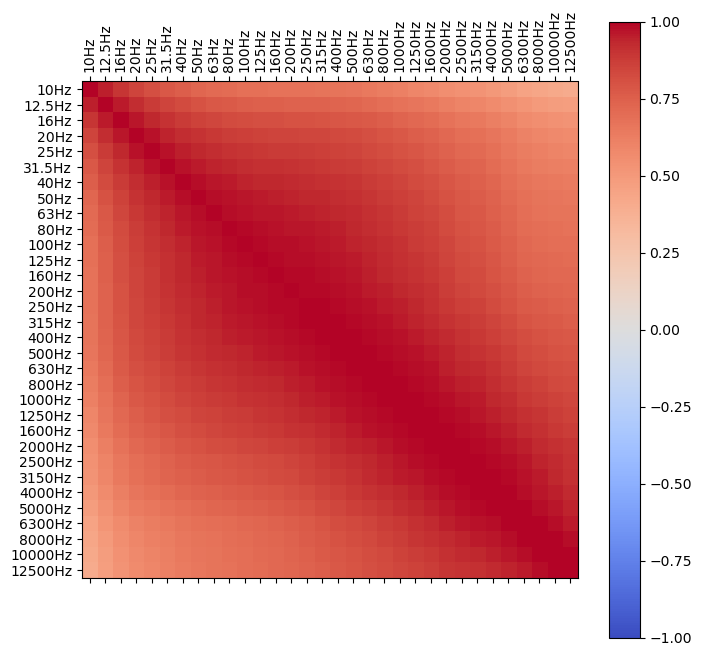

In [46]:
corr = plot_corr(kong1920_ST_tol_df)

#### Plot decade band and TOL correlation

In [14]:
kong1819_aural_tol_1D_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_daily_TOL.csv")

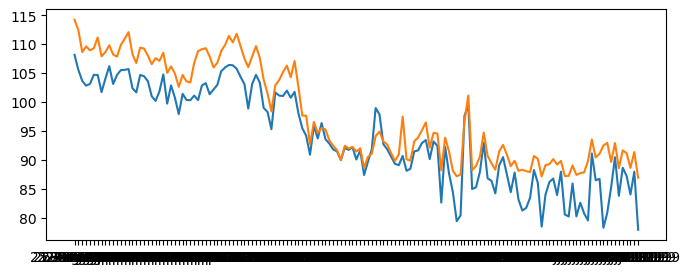

In [15]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(kong1819_aural_tol_1D_df.Time, kong1819_aural_tol_1D_df['400Hz'])
plt.plot(kong1819_aural_1to10kHz_df.Time, kong1819_aural_1to10kHz_df.Hz1000to10000)

In [16]:
np.corrcoef(kong1819_aural_1to10kHz_df.Hz1000to10000, kong1819_aural_tol_1D_df['400Hz'])

array([[1.        , 0.95235028],
       [0.95235028, 1.        ]])

In [17]:
kong1920_ST_tol_1D_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_daily_TOL.csv")

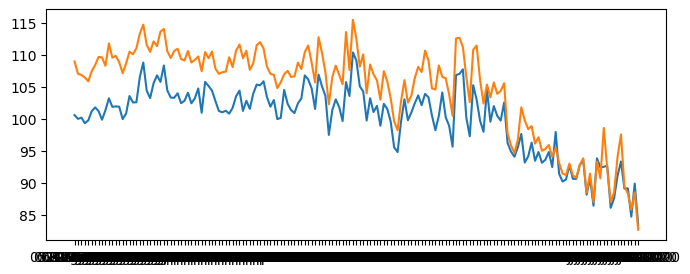

In [18]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(kong1920_ST_tol_1D_df.Time, kong1920_ST_tol_1D_df['400Hz'])
plt.plot(kong1920_ST_1to10kHz_df.Time, kong1920_ST_1to10kHz_df.Hz1000to10000)

In [19]:
np.corrcoef(kong1920_ST_1to10kHz_df.Hz1000to10000, kong1920_ST_tol_1D_df['400Hz'])

array([[1.        , 0.96456552],
       [0.96456552, 1.        ]])

### Sverdrup

#### Violin plots of TOL bands

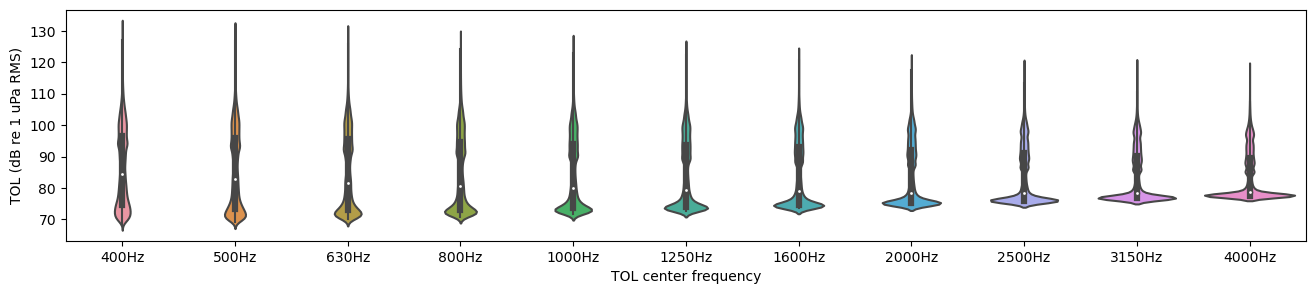

In [40]:
tol_violin_plots(sver1819_aural_tol_df,'400Hz','4000Hz')

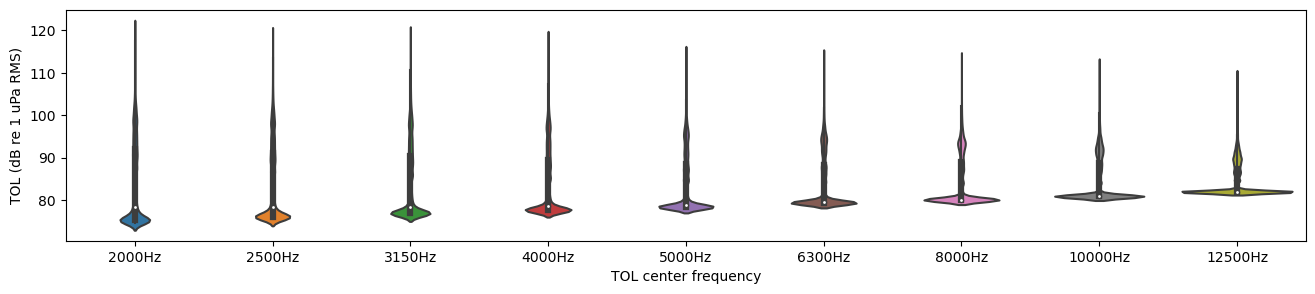

In [43]:
tol_violin_plots(sver1819_aural_tol_df,'2000Hz','12500Hz')

#### 1-10 kHz decade level

In [12]:
sver1819_aural_1to10kHz_df['Hz1000to10000'].median()

93.792223471265

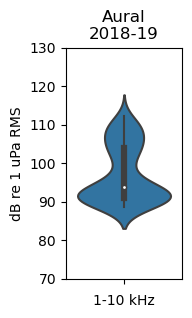

In [81]:
plt.rcParams['figure.figsize'] = (1.5,3)
fig, (ax1) = plt.subplots(1,1, sharey=True)
sns.violinplot(y=sver1819_aural_1to10kHz_df['Hz1000to10000'], ax=ax1)
ax1.set_title('Aural\n2018-19')
ax1.set_ylim(70,130)

ax1.set_ylabel("dB re 1 uPa RMS")
ax1.set_xlabel("1-10 kHz");

#### Look at correlation between TOL bands

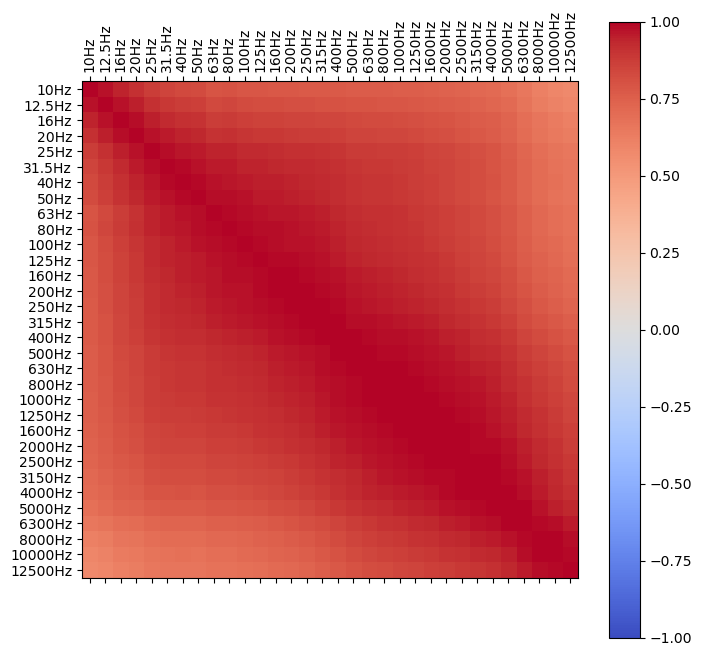

In [32]:
plot_corr(sver1819_aural_tol_df)

#### Plot decade band and TOL correlation

In [9]:
sver1819_aural_tol_1D_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_daily_TOL.csv")

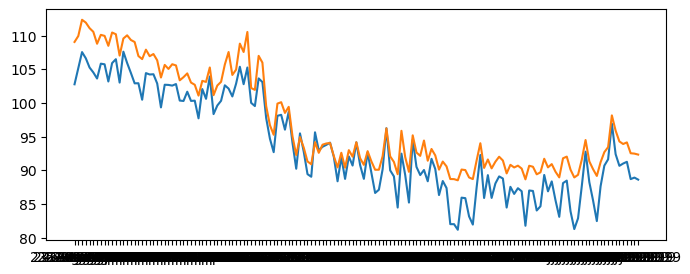

In [10]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(sver1819_aural_tol_1D_df.Time, sver1819_aural_tol_1D_df['400Hz'])
plt.plot(sver1819_aural_1to10kHz_df.Time, sver1819_aural_1to10kHz_df.Hz1000to10000)

In [13]:
np.corrcoef(sver1819_aural_1to10kHz_df.Hz1000to10000, sver1819_aural_tol_1D_df['400Hz'])

array([[1.        , 0.97186661],
       [0.97186661, 1.        ]])

***

### Look at 4 kHz band exceedance levels
Compare L99, L90, and L50 over the open-water period. We want to see a separation of a few dB.

In [86]:
kong1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_TOL_daily_prctiles.csv")
kong1920_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_AuralM2_TOL_daily_prctiles.csv")
kong1920_st_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_TOL_UTC_daily_prctiles.csv")
rink1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_TOL_daily_prctiles.csv")
rink1920_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_AuralM2_TOL_daily_prctiles.csv")
rink1920_st_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_ST_TOL_UTC_daily_prctiles.csv")
sver1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_TOL_daily_prctiles.csv")

In [23]:
def make_sound_ds(prctiles_df):
    time_list = []
    for i in range(len(prctiles_df.Time)):
        if prctiles_df.Time[i][3:6] == 'Aug':
            month = '08'
        elif prctiles_df.Time[i][3:6] == 'Sep':
            month = '09'
        elif prctiles_df.Time[i][3:6] == 'Oct':
            month = '10'
        elif prctiles_df.Time[i][3:6] == 'Nov':
            month = '11'
        elif prctiles_df.Time[i][3:6] == 'Dec':
            month = '12'
        date_tmp = prctiles_df.Time[i][7:11]+'-'+month+'-'+prctiles_df.Time[i][0:2]
        time_list.append(date_tmp)
    
    ## make dataset
    ds = xr.Dataset(data_vars=dict(L50_4kHz=(["time"], prctiles_df['4000Hz_L50']),
                                   L90_4kHz=(["time"], prctiles_df['4000Hz_L90']),
                                   L99_4kHz=(["time"], prctiles_df['4000Hz_L99'])),
        coords=dict(time=np.array(time_list, dtype='datetime64')))
    
    ## plot three levels
    if pd.to_datetime(ds.time.isel(time=0).values).year == 2018:
        ds.sel(time=slice("2018-08","2018-11")).L99_4kHz.plot(label='L99')
        ds.sel(time=slice("2018-08","2018-11")).L90_4kHz.plot(label='L90')
        ds.sel(time=slice("2018-08","2018-11")).L50_4kHz.plot(label='L50')
    else:
        ds.sel(time=slice("2019-08","2019-11")).L99_4kHz.plot(label='L99')
        ds.sel(time=slice("2019-08","2019-11")).L90_4kHz.plot(label='L90')
        ds.sel(time=slice("2019-08","2019-11")).L50_4kHz.plot(label='L50')    
    
    plt.legend()
    plt.grid()
    plt.ylabel("Exceedance level (dB re 1 uPa RMS)");
    plt.show()
    
    ## plot difference in L50 and L99 exceedance level to see whether it differs by a few dB
    if pd.to_datetime(ds.time.isel(time=0).values).year == 2018:
        delta_dB = ds.sel(time=slice("2018-08","2018-12")).L50_4kHz - ds.sel(time=slice("2018-08","2018-12")).L99_4kHz
    else: delta_dB = ds.sel(time=slice("2019-08","2019-12")).L50_4kHz - ds.sel(time=slice("2019-08","2019-12")).L99_4kHz
    delta_dB.plot()
    plt.grid()
    plt.ylim(0,10)
    plt.ylabel("Exceedance level (dB re 1 uPa RMS)");
    
    return ds.sortby(ds.time)

#### Rink/Fisher

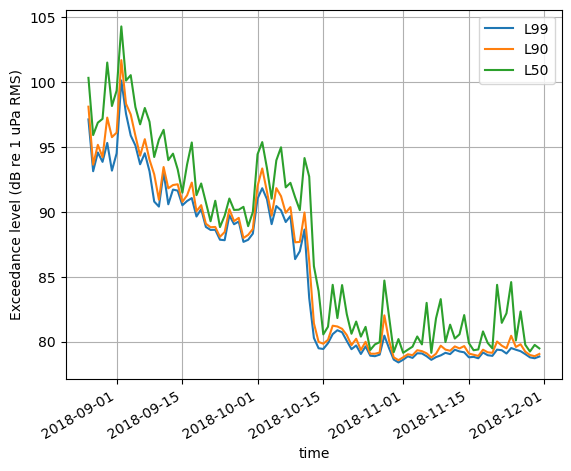

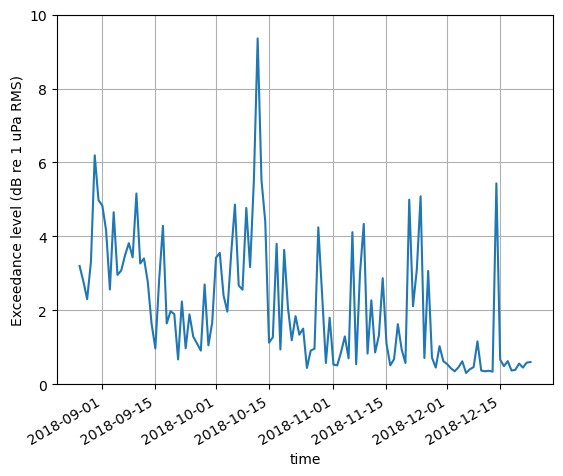

In [24]:
rink1819_au_4kHz_prctiles_ds = make_sound_ds(rink1819_au_tol_prctiles_df)

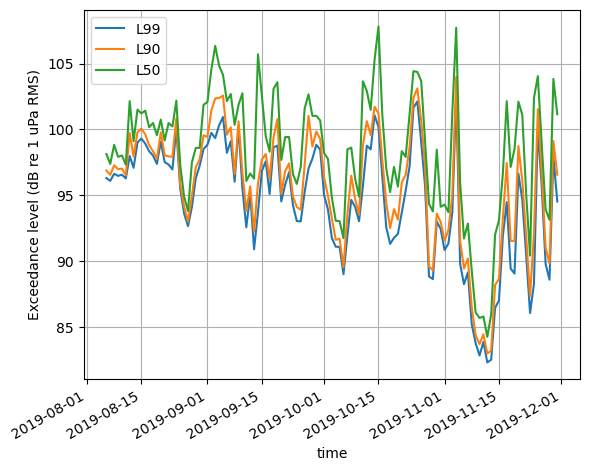

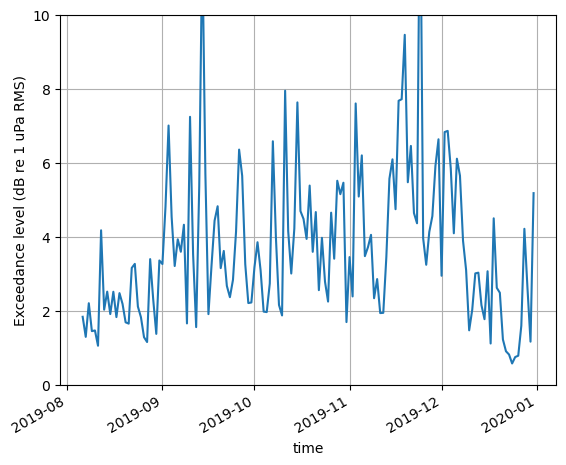

In [25]:
rink1920_au_4kHz_prctiles_ds = make_sound_ds(rink1920_au_tol_prctiles_df)

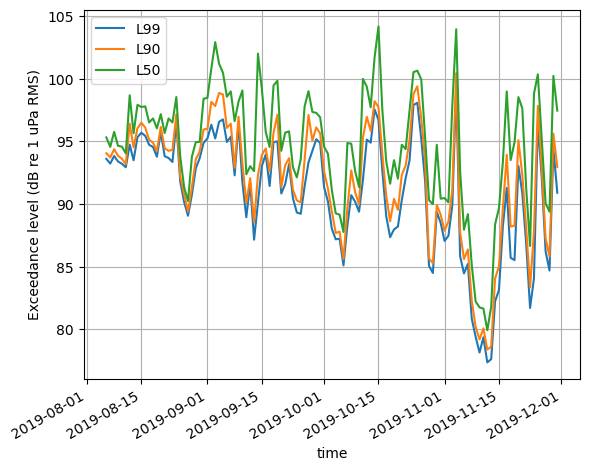

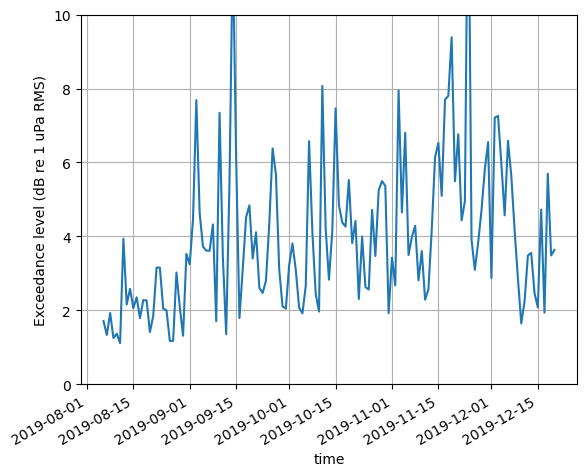

In [26]:
rink1920_st_4kHz_prctiles_ds = make_sound_ds(rink1920_st_tol_prctiles_df)

#### Kong Oscar

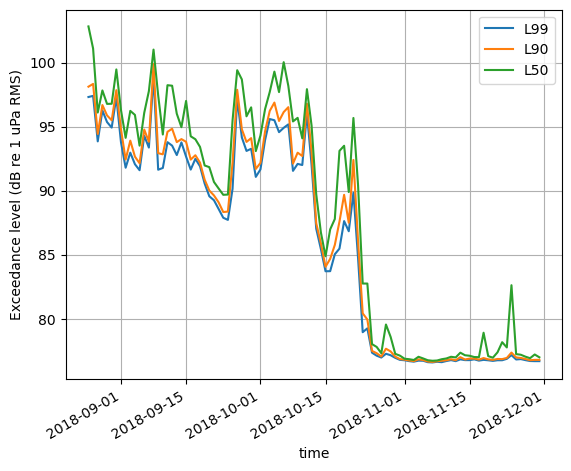

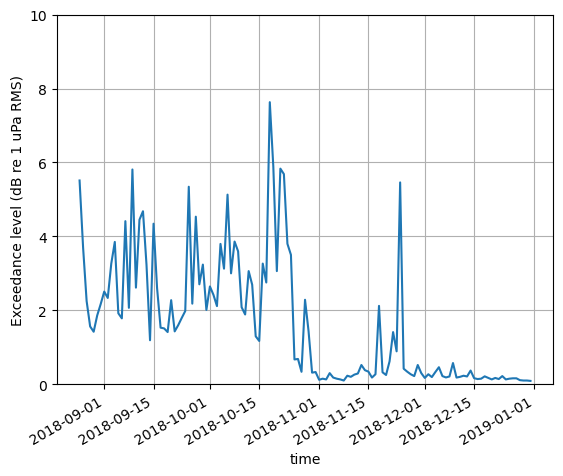

In [27]:
kong1819_au_4kHz_prctiles_ds = make_sound_ds(kong1819_au_tol_prctiles_df)

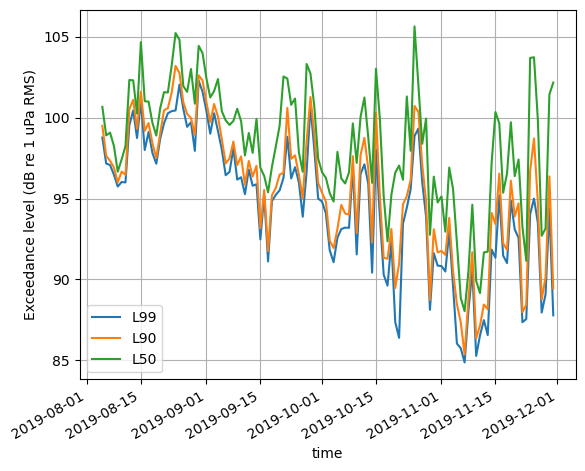

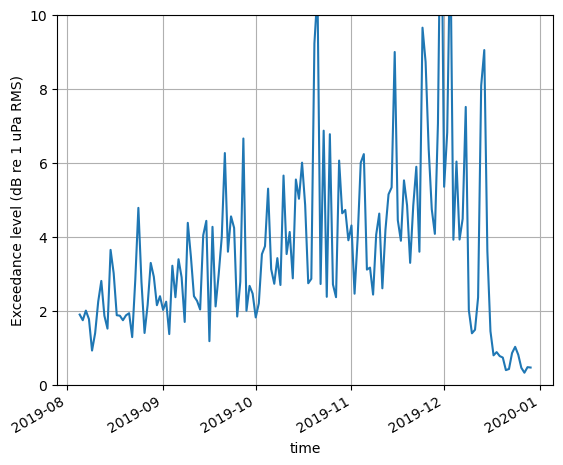

In [28]:
kong1920_au_4kHz_prctiles_ds = make_sound_ds(kong1920_au_tol_prctiles_df)

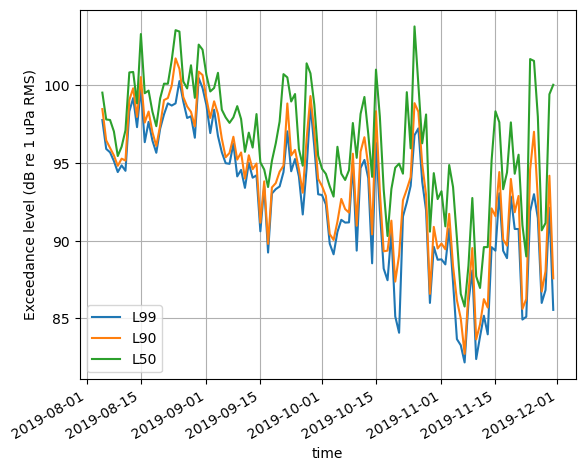

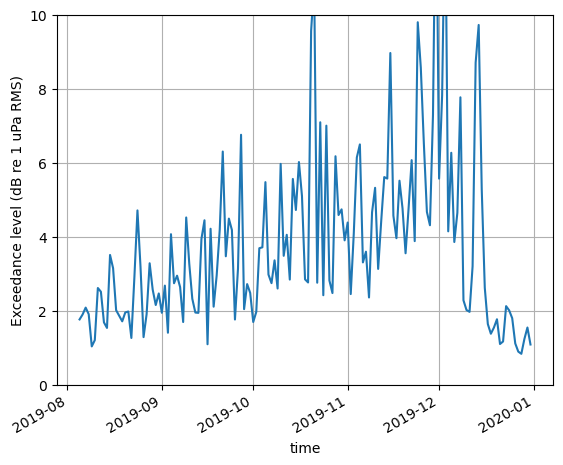

In [29]:
kong1920_st_4kHz_prctiles_ds = make_sound_ds(kong1920_st_tol_prctiles_df)

#### Sverdrup

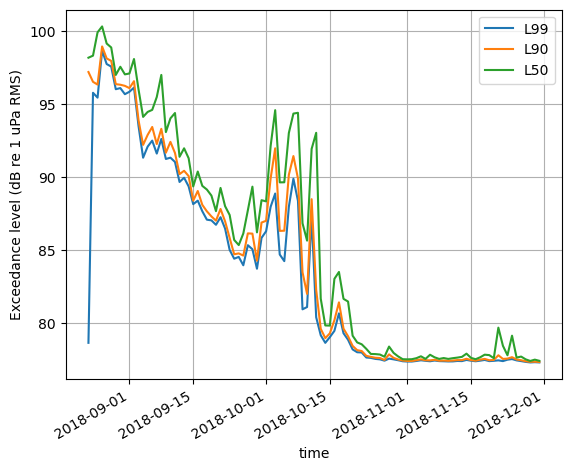

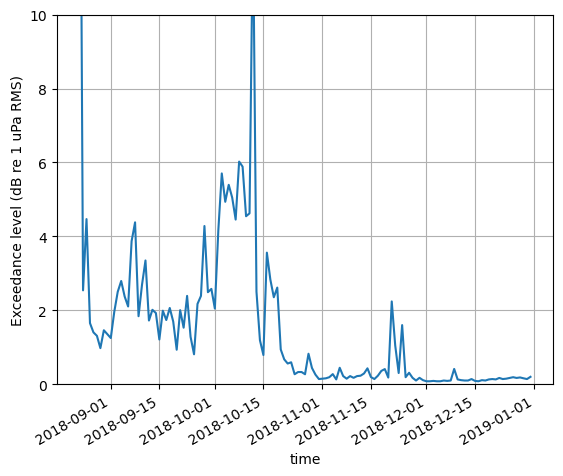

In [30]:
sver1819_au_4kHz_prctiles_ds = make_sound_ds(sver1819_au_tol_prctiles_df)

### Look at 2500 Hz band exceedance levels
Compare L99, L90, and L50 over the open-water period. We want to see a separation of a few dB.

In [10]:
kong1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Kong_Oscar_2018-2019_AuralM2_TOL_daily_prctiles.csv")
kong1920_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_AuralM2_TOL_daily_prctiles.csv")
kong1920_st_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Nuussuaq_KongOscar_ST_TOL_UTC_daily_prctiles.csv")
rink1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_2018-19_AuralM2_TOL_daily_prctiles.csv")
rink1920_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_AuralM2_TOL_daily_prctiles.csv")
rink1920_st_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Rink_Glacier_Fischer_ST_TOL_UTC_daily_prctiles.csv")
sver1819_au_tol_prctiles_df = pd.read_csv("D:/Habitat_model_data/ambient_sound/TOL_daily/Sverdrup2018-19_AuralM2_TOL_daily_prctiles.csv")

In [15]:
def make_sound_ds(prctiles_df):
    time_list = []
    for i in range(len(prctiles_df.Time)):
        if prctiles_df.Time[i][3:6] == 'Aug':
            month = '08'
        elif prctiles_df.Time[i][3:6] == 'Sep':
            month = '09'
        elif prctiles_df.Time[i][3:6] == 'Oct':
            month = '10'
        elif prctiles_df.Time[i][3:6] == 'Nov':
            month = '11'
        elif prctiles_df.Time[i][3:6] == 'Dec':
            month = '12'
        date_tmp = prctiles_df.Time[i][7:11]+'-'+month+'-'+prctiles_df.Time[i][0:2]
        time_list.append(date_tmp)
    
    ## make dataset
    ds = xr.Dataset(data_vars=dict(L50_4kHz=(["time"], prctiles_df['2500Hz_L50']),
                                   L90_4kHz=(["time"], prctiles_df['2500Hz_L90']),
                                   L99_4kHz=(["time"], prctiles_df['2500Hz_L99'])),
        coords=dict(time=np.array(time_list, dtype='datetime64')))
    
    ## plot three levels
    if pd.to_datetime(ds.time.isel(time=0).values).year == 2018:
        ds.sel(time=slice("2018-08","2018-11")).L99_4kHz.plot(label='L99')
        ds.sel(time=slice("2018-08","2018-11")).L90_4kHz.plot(label='L90')
        ds.sel(time=slice("2018-08","2018-11")).L50_4kHz.plot(label='L50')
    else:
        ds.sel(time=slice("2019-08","2019-11")).L99_4kHz.plot(label='L99')
        ds.sel(time=slice("2019-08","2019-11")).L90_4kHz.plot(label='L90')
        ds.sel(time=slice("2019-08","2019-11")).L50_4kHz.plot(label='L50')    
    
    plt.legend()
    plt.grid()
    plt.ylabel("Exceedance level (dB re 1 uPa RMS)");
    plt.show()
    
    ## plot difference in L50 and L99 exceedance level to see whether it differs by a few dB
    if pd.to_datetime(ds.time.isel(time=0).values).year == 2018:
        delta_dB = ds.sel(time=slice("2018-08","2018-12")).L50_4kHz - ds.sel(time=slice("2018-08","2018-12")).L99_4kHz
    else: delta_dB = ds.sel(time=slice("2019-08","2019-12")).L50_4kHz - ds.sel(time=slice("2019-08","2019-12")).L99_4kHz
    delta_dB.plot()
    plt.grid()
    plt.ylim(0,6)
    plt.ylabel("Exceedance level (dB re 1 uPa RMS)");
    
    return ds.sortby(ds.time)

#### Rink/Fisher

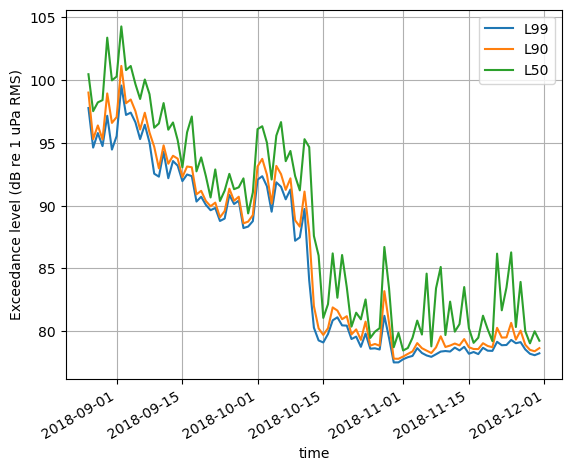

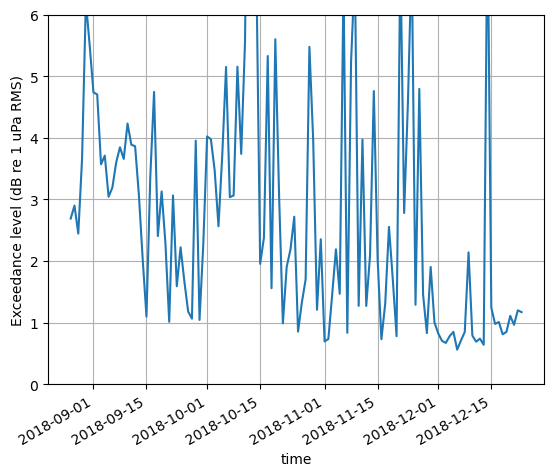

In [16]:
rink1819_au_2500Hz_prctiles_ds = make_sound_ds(rink1819_au_tol_prctiles_df)

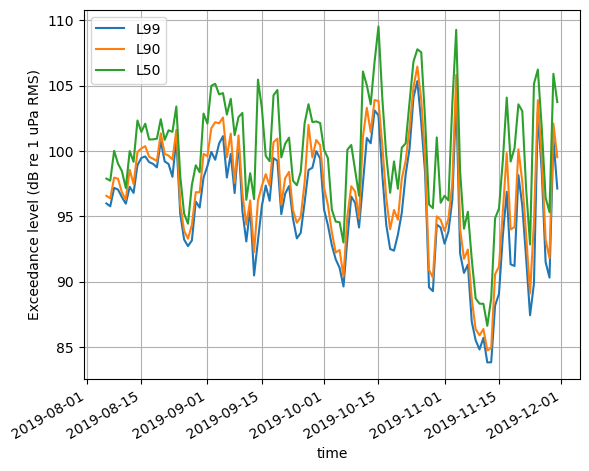

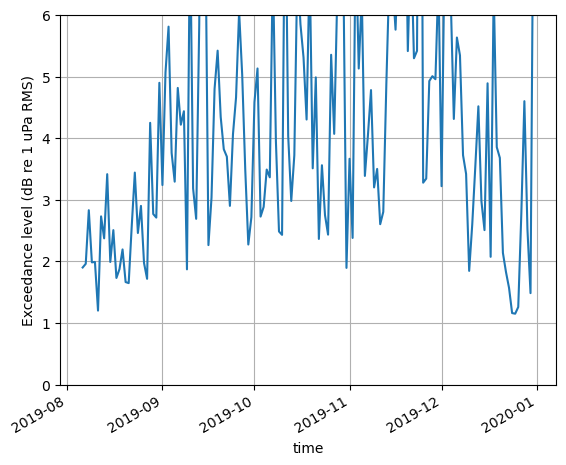

In [17]:
rink1920_au_2500Hz_prctiles_ds = make_sound_ds(rink1920_au_tol_prctiles_df)

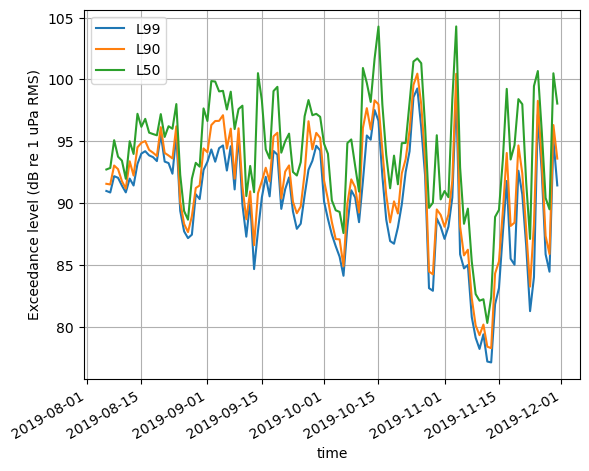

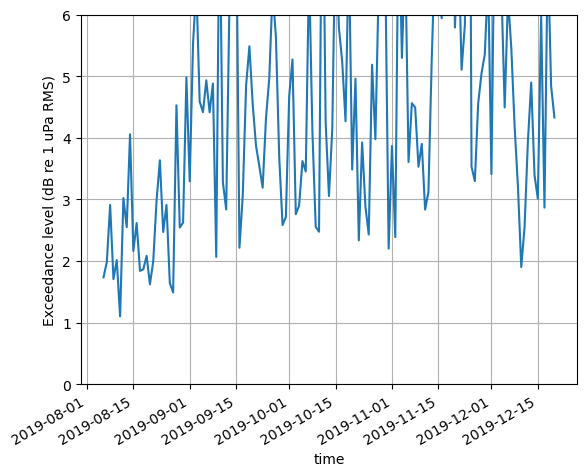

In [18]:
rink1920_st_2500Hz_prctiles_ds = make_sound_ds(rink1920_st_tol_prctiles_df)

#### Kong Oscar

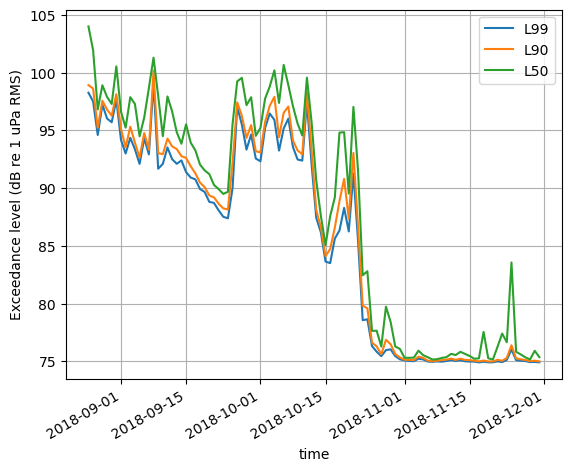

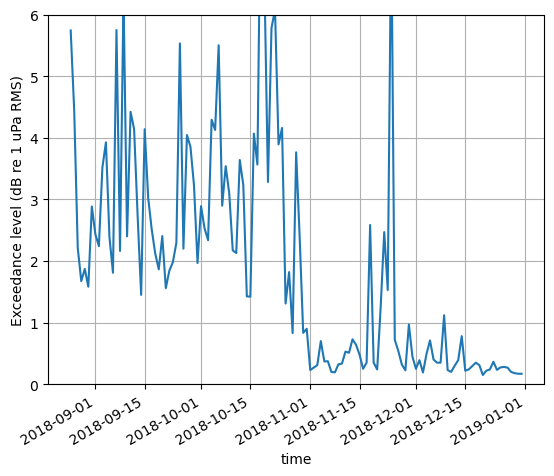

In [19]:
kong1819_au_2500Hz_prctiles_ds = make_sound_ds(kong1819_au_tol_prctiles_df)

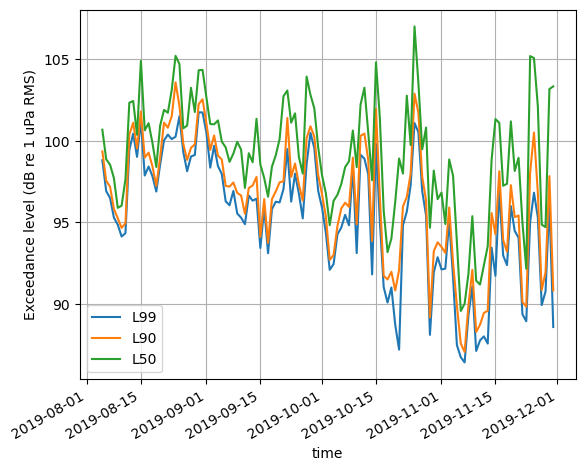

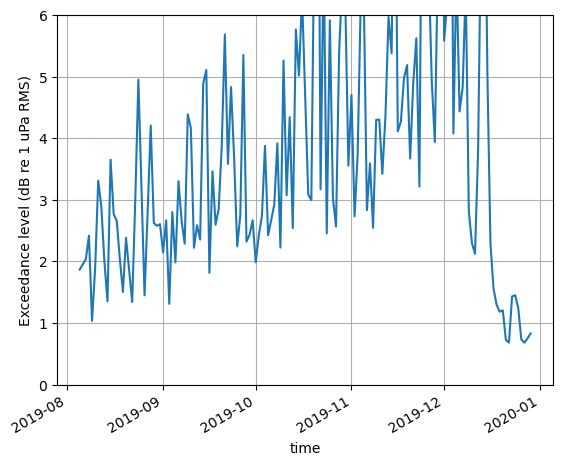

In [20]:
kong1920_au_2500Hz_prctiles_ds = make_sound_ds(kong1920_au_tol_prctiles_df)

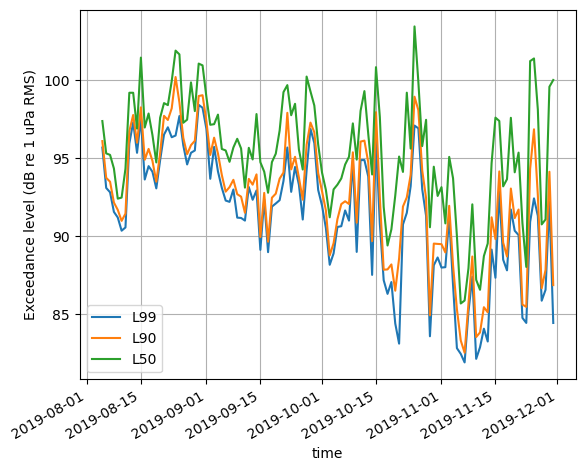

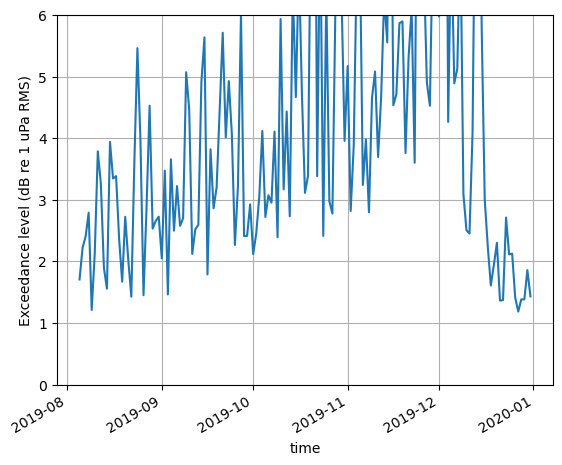

In [21]:
kong1920_st_2500Hz_prctiles_ds = make_sound_ds(kong1920_st_tol_prctiles_df)

#### Sverdrup

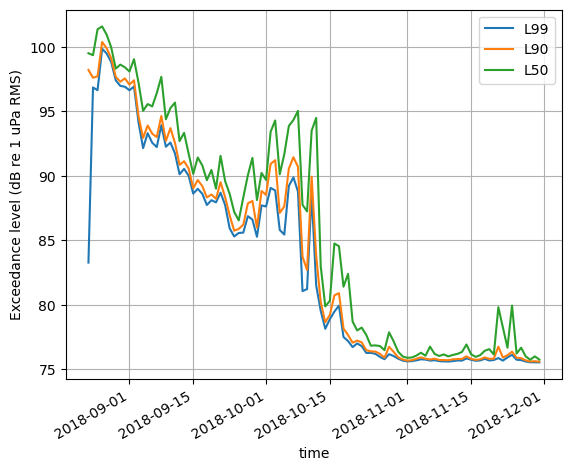

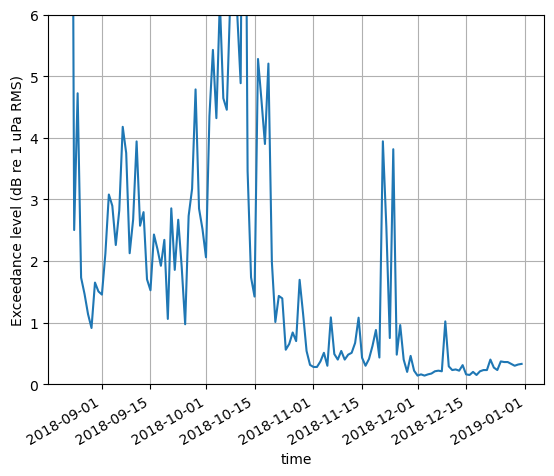

In [22]:
sver1819_au_2500Hz_prctiles_ds = make_sound_ds(sver1819_au_tol_prctiles_df)